<a href="https://colab.research.google.com/github/Gaeli75/Deep-Learning-Pratices-1/blob/main/Bikes_Testing_Shap_PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore')

import sklearn
sklearn.set_config(transform_output="pandas")

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate

from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/gerberl/6G7V0015_2425/refs/heads/main/datasets/bike.csv')
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,985,0
1,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,801,1
2,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,43.7273,16.636703,1349,2
3,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,59.0435,10.739832,1562,3
4,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,43.6957,12.522300,1600,4


In [8]:
X = df.drop(columns='cnt')
y = df['cnt']

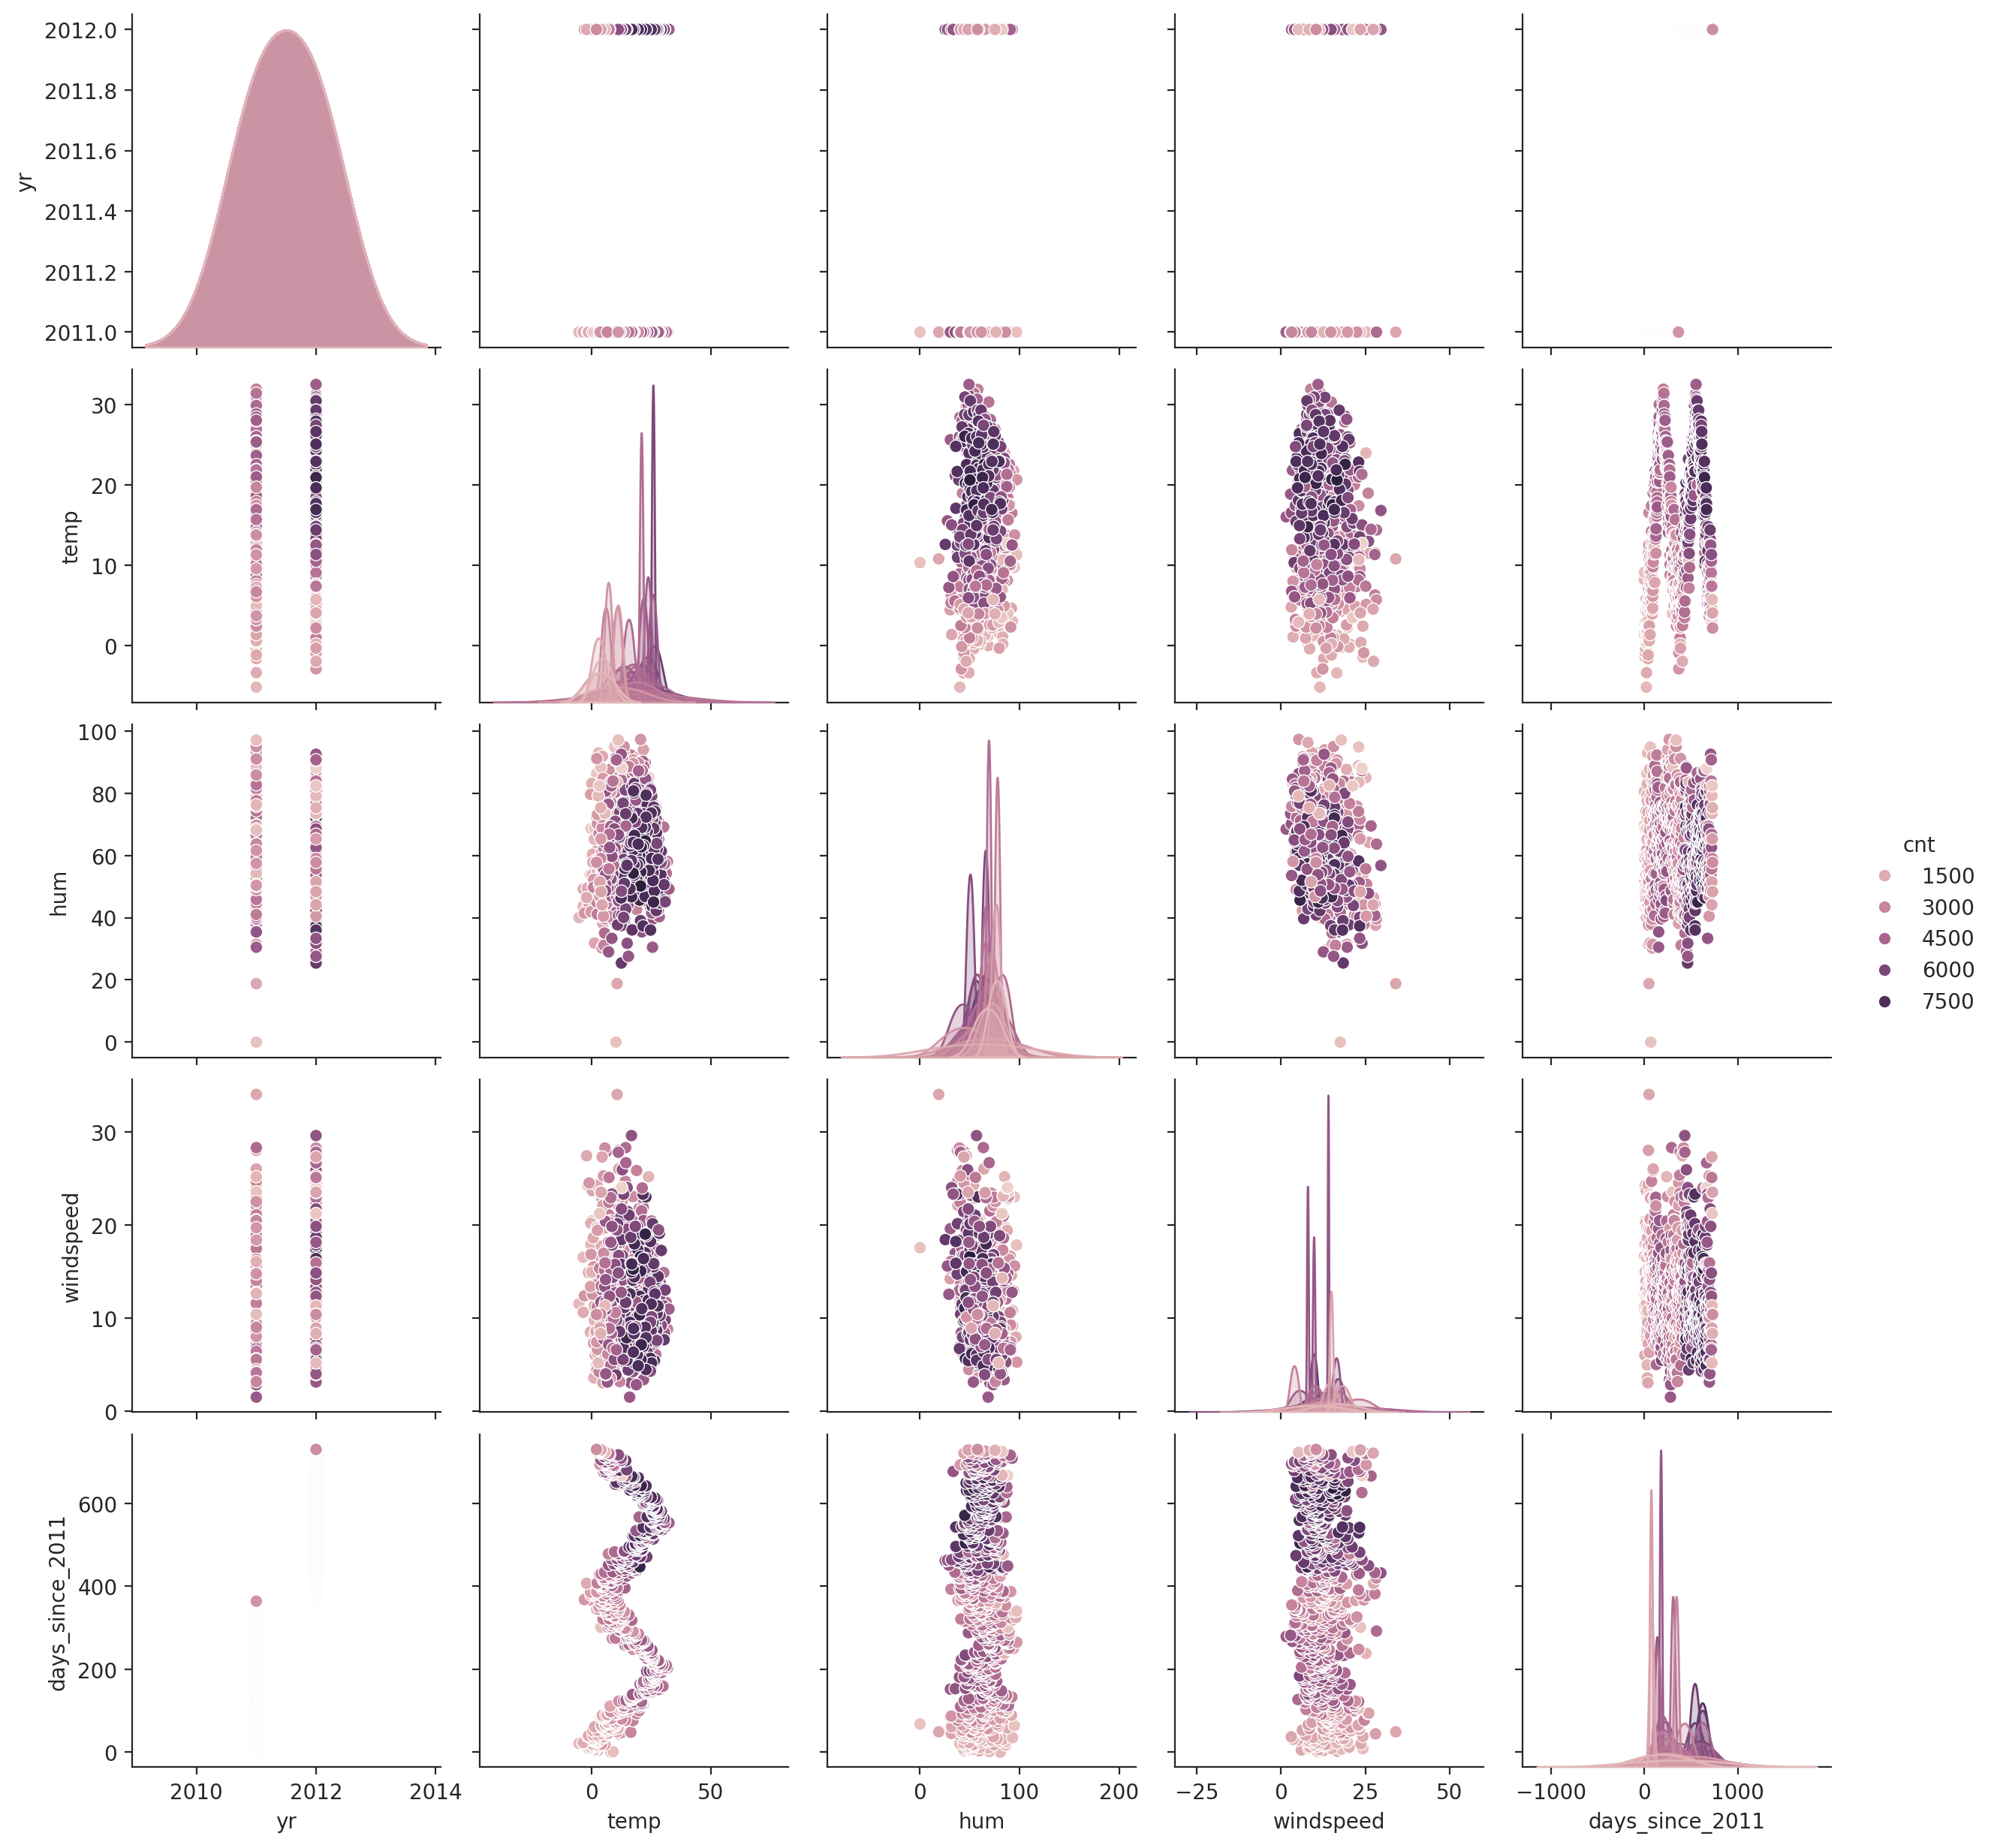

In [10]:
sns.pairplot(df, hue='cnt')

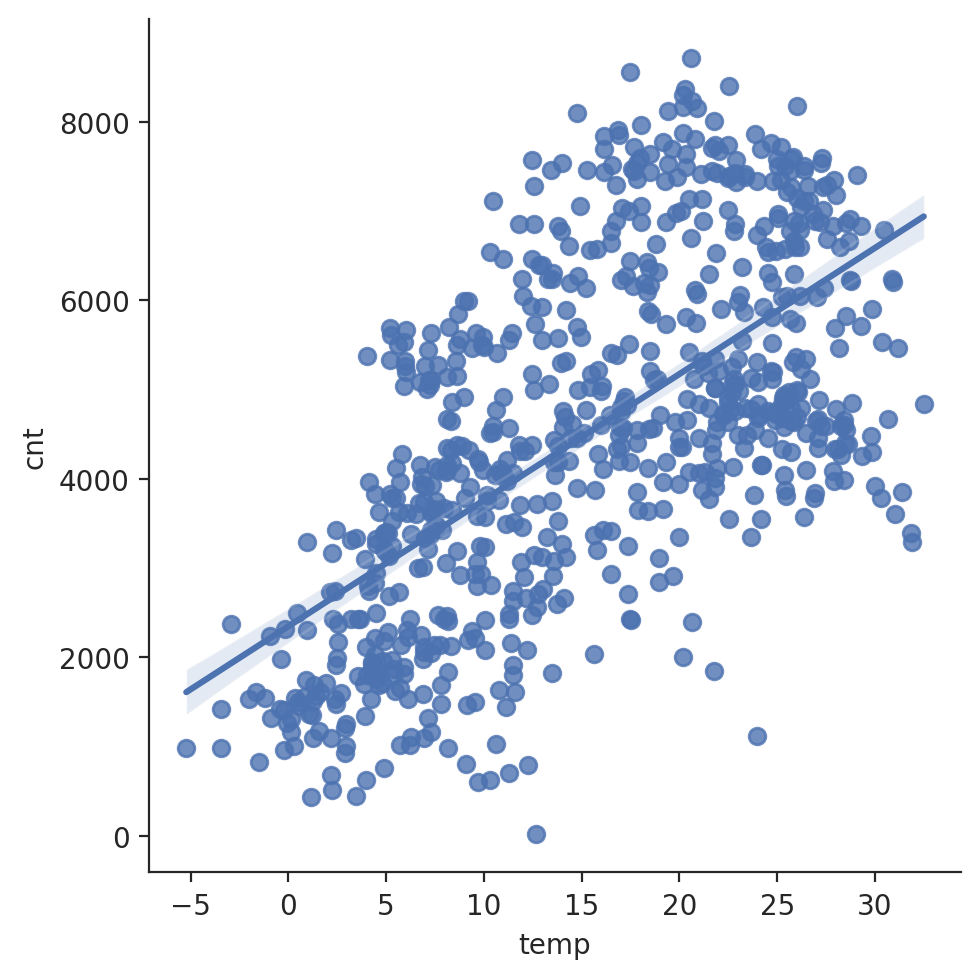

In [21]:
sns.lmplot(x='temp', y='cnt', data=df)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        # ("scaler", MinMaxScaler())
    ]
)


In [13]:
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", TargetEncoder(target_type='continuous')),
    ]
)

In [14]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, make_column_selector(dtype_include=np.number)),
        ("cat", categorical_transformer, make_column_selector(dtype_include=object)),
    ],
    verbose_feature_names_out=False  # Prevents adding transformer names as prefixes
)

In [17]:
rf_regr = RandomForestRegressor(
    n_estimators=1000,
    max_depth=8, min_samples_split=10, min_samples_leaf=10,
    max_features=0.8)

In [18]:
rfr = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("regressor", rf_regr)
    ]
)

In [20]:
rfr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7acad15b4710>),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   TargetEncoder(target_type='continuous'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7acad15b7b50>)],
                                   verbose_feature_names_out=False)),
                ('regressor',
                 RandomForestRegressor(max_depth=8, max_features=0.8,
                                       min_samples_leaf=10,
                                       min_samples_split=10,
                                       n_estimators=1000))])

In [22]:
rfr.score(X_test, y_test)

0.9935411630545017

In [23]:
rfr.score(X_test, y_test)

0.9935411630545017